In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
import sklearn 
warnings.filterwarnings("ignore", category=FutureWarning)
from pandas.api.types import CategoricalDtype


In [ ]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_colwidth', None)

In [ ]:
#file paths
path_name = r"C:\Users\sarav\Desktop\Fall 2023\IE 7275 Data Mining\Project\dataset\name.basics.tsv\data.tsv"
path_akas = r"C:\Users\sarav\Desktop\Fall 2023\IE 7275 Data Mining\Project\dataset\title.akas.tsv\data.tsv"
path_basics = r"C:\Users\sarav\Desktop\Fall 2023\IE 7275 Data Mining\Project\dataset\title.basics.tsv\data.tsv"
path_principals = r"C:\Users\sarav\Desktop\Fall 2023\IE 7275 Data Mining\Project\dataset\title.principals.tsv\data.tsv"
path_ratings = r"C:\Users\sarav\Desktop\Fall 2023\IE 7275 Data Mining\Project\dataset\title.ratings.tsv\data.tsv"

In [ ]:
#read files
df_name = pd.read_csv(path_name, sep = '\t', header = 0)
df_akas = pd.read_csv(path_akas, sep = '\t', header = 0, dtype = {'isOriginalTitle' : str})
df_basics = pd.read_csv(path_basics, sep = '\t', header = 0, dtype = {'isAdult' : str})
df_principals = pd.read_csv(path_principals, sep = '\t', header = 0)
df_ratings = pd.read_csv(path_ratings, sep = '\t', header = 0)

In [ ]:
df_name

In [ ]:
# Drop duplicates
df_name_w = df_name.drop_duplicates()
df_akas_w = df_akas.drop_duplicates()


In [ ]:
df_basics_w = df_basics.drop_duplicates()


In [ ]:
df_principals_w = df_principals.drop_duplicates()

In [ ]:
df_ratings_w = df_ratings.drop_duplicates()

In [ ]:
# Drop rows with missing values
df_name_w.dropna(inplace=True)
df_akas_w.dropna(inplace=True)
df_basics_w.dropna(inplace=True)

### Preprocessing, Transformation

In [ ]:
df_ratings_w.columns

In [ ]:
df_name_w.drop(['birthYear','deathYear','knownForTitles'], axis = 1, inplace = True)

In [ ]:
df_basics_w.drop(['originalTitle'], axis = 1, inplace = True)

In [ ]:
df_principals_w.drop(['ordering','characters', 'job'], axis = 1, inplace = True)

In [ ]:
print(df_ratings_w.shape)
print(df_basics_w.shape)

In [ ]:
df_basics_w['tconst'].nunique()

In [ ]:
df_pred = pd.merge(df_basics_w, df_ratings_w, on = 'tconst', how = 'inner')

In [ ]:
df_pred

In [ ]:
df_principals_w

In [ ]:
df_pred['tconst'].nunique()

In [ ]:
print(df_principals_w.shape)
print(df_principals_w['tconst'].nunique())

In [ ]:
df_pred = pd.merge(df_pred, df_principals_w, on = 'tconst', how = 'inner')
df_pred

In [ ]:
df_pred.isna().sum()

In [ ]:
df_name_w

In [ ]:
print(df_name_w['nconst'].nunique())
print(df_name_w.shape)

In [ ]:
df_pred['nconst'].nunique()

In [ ]:
df_pred2 = pd.merge(df_pred, df_name_w, on='nconst', how='inner')

In [ ]:
df_pred2

In [ ]:
df_pred.shape

In [ ]:
df_pred2.shape

In [ ]:
df_pred['tconst'].nunique()

In [ ]:
df_pred2['tconst'].nunique()

In [ ]:
df_pred2.isna().sum()

In [ ]:
df_pred2.info()

In [ ]:
df_pred2['isAdult'] = df_pred2['isAdult'].astype(bool)

In [ ]:
df_pred2.info()

In [ ]:
df_pred2['runtimeMinutes'] = df_pred2['runtimeMinutes'].apply(pd.to_numeric, errors ='coerce')

In [ ]:
df_pred2.info()

In [ ]:
df_pred2

In [ ]:
df_pred2.to_csv('df_pred2', header = True, index = False)

In [37]:
df1['tconst'].nunique()

1335381

### Feature Engineering

In [36]:
df1 = pd.read_csv(r"C:\Users\sarav\Desktop\Fall 2023\IE 7275 Data Mining\Project\df_pred2")
df.head(30)

C:\Users\sarav\AppData\Local\Temp\ipykernel_14072\3328286210.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(r"C:\Users\sarav\Desktop\Fall 2023\IE 7275 Data Mining\Project\df_pred2")


,tconst,isAdult,startYear,runtimeMinutes,genres,averageRating,numVotes,nconst,category,primaryName,titleType_movie,titleType_short,titleType_tvMovie,titleType_tvShort,titleType_tvSpecial,titleType_video
tconst_nconst,,,,,,,,,,,,,,,,
"tt0000001,nm1588970",tt0000001,True,1894.0,1.0,"Documentary,Short",5.7,2002,nm1588970,self,Carmencita,False,True,False,False,False,False
"tt0000001,nm0005690",tt0000001,True,1894.0,1.0,"Documentary,Short",5.7,2002,nm0005690,director,William K.L. Dickson,False,True,False,False,False,False
"tt0000005,nm0005690",tt0000005,True,1893.0,1.0,"Comedy,Short",6.2,2678,nm0005690,director,William K.L. Dickson,False,True,False,False,False,False
"tt0000006,nm0005690",tt0000006,True,1894.0,1.0,Short,5.0,182,nm0005690,director,William K.L. Dickson,False,True,False,False,False,False
"tt0000007,nm0005690",tt0000007,True,1894.0,1.0,"Short,Sport",5.4,838,nm0005690,director,William K.L. Dickson,False,True,False,False,False,False
"tt0000008,nm0005690",tt0000008,True,1894.0,1.0,"Documentary,Short",5.4,2144,nm0005690,director,William K.L. Dickson,False,True,False,False,False,False
"tt0000036,nm0005690",tt0000036,True,1896.0,1.0,"Drama,Short",4.4,610,nm0005690,director,William K.L. Dickson,False,True,False,False,False,False
"tt0000060,nm0005690",tt0000060,True,1896.0,NaN,"Documentary,Short",7.4,89,nm0005690,director,William K.L. Dickson,False,True,False,False,False,False
"tt0000076,nm0005690",tt0000076,True,1896.0,1.0,"Drama,Short",4.5,542,nm0005690,director,William K.L. Dickson,False,True,False,False,False,False


In [4]:
df['startYear'] = pd.to_datetime(df['startYear'], errors='coerce', format ='%Y').dt.year

df['endYear'] = pd.to_datetime(df['endYear'], errors='coerce', format='%Y').dt.year


In [5]:
df['endYear'].unique()

array([  nan, 1992., 2007., 1989., 2011., 1955., 1958., 1965., 1975.,
       2006., 2015., 2017., 2013., 1960., 1967., 1980., 1962., 1999.,
       1954., 1961., 1953., 1950., 1979., 2004., 1973., 1957., 1956.,
       1971., 1951., 1972., 1938., 1976., 1987., 1982., 1959., 1984.,
       1988., 1970., 1985., 1952., 1963., 1974., 1969., 1949., 1966.,
       2014., 1978., 2000., 1964., 1981., 1997., 2016., 1983., 1977.,
       1968., 2008., 1986., 1991., 1998., 2003., 1995., 2019., 2018.,
       1993., 1990., 2010., 1994., 2009., 2001., 1996., 2021., 2023.,
       1945., 2012., 2022., 2002., 2005., 2020., 2024., 2025., 1933.,
       2030.])

In [6]:
df.dtypes

tconst                object
titleType             object
primaryTitle          object
isAdult                 bool
startYear            float64
endYear              float64
runtimeMinutes       float64
genres                object
averageRating        float64
numVotes               int64
nconst                object
category              object
primaryName           object
primaryProfession     object
dtype: object

In [7]:
df['tconst_nconst'] = df['tconst'] + ',' + df['nconst']

In [ ]:
df.dtypes

In [8]:
df.set_index('tconst_nconst', inplace = True)

In [9]:
df.dtypes

tconst                object
titleType             object
primaryTitle          object
isAdult                 bool
startYear            float64
endYear              float64
runtimeMinutes       float64
genres                object
averageRating        float64
numVotes               int64
nconst                object
category              object
primaryName           object
primaryProfession     object
dtype: object

In [10]:
df['titleType'].unique()

array(['short', 'movie', 'tvEpisode', 'video', 'tvSpecial', 'tvMovie',
       'tvSeries', 'videoGame', 'tvShort', 'tvMiniSeries'], dtype=object)

In [12]:
df['titleType'].value_counts()

titleType
tvEpisode       5583901
movie           2605139
short            972477
tvSeries         664396
tvMovie          441069
video            382447
tvMiniSeries     115067
tvSpecial         87737
videoGame         82037
tvShort           15705
Name: count, dtype: int64

In [14]:
title_type_to_remove = ['tvEpisode','tvSeries','tvMiniSeries','videoGame']

In [15]:
df2 = df['titleType'].isin(title_type_to_remove)

In [17]:
df = df[~df2]

C:\Users\sarav\AppData\Local\Temp\ipykernel_14072\823939624.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[~df2]


In [18]:
df

,tconst,titleType,primaryTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,nconst,category,primaryName,primaryProfession
tconst_nconst,,,,,,,,,,,,,,
"tt0000001,nm1588970",tt0000001,short,Carmencita,True,1894.0,NaN,1.0,"Documentary,Short",5.7,2002,nm1588970,self,Carmencita,soundtrack
"tt0000001,nm0005690",tt0000001,short,Carmencita,True,1894.0,NaN,1.0,"Documentary,Short",5.7,2002,nm0005690,director,William K.L. Dickson,"cinematographer,director,producer"
"tt0000005,nm0005690",tt0000005,short,Blacksmith Scene,True,1893.0,NaN,1.0,"Comedy,Short",6.2,2678,nm0005690,director,William K.L. Dickson,"cinematographer,director,producer"
"tt0000006,nm0005690",tt0000006,short,Chinese Opium Den,True,1894.0,NaN,1.0,Short,5.0,182,nm0005690,director,William K.L. Dickson,"cinematographer,director,producer"
"tt0000007,nm0005690",tt0000007,short,Corbett and Courtney Before the Kinetograph,True,1894.0,NaN,1.0,"Short,Sport",5.4,838,nm0005690,director,William K.L. Dickson,"cinematographer,director,producer"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"tt9916730,nm13233318",tt9916730,movie,6 Gunn,True,2017.0,NaN,116.0,Drama,7.6,11,nm13233318,actor,Ganesh Vasant Patil,"production_manager,actor"
"tt9916730,nm10538612",tt9916730,movie,6 Gunn,True,2017.0,NaN,116.0,Drama,7.6,11,nm10538612,director,Kiran Gawade,"director,writer"
"tt9916730,nm10538614",tt9916730,movie,6 Gunn,True,2017.0,NaN,116.0,Drama,7.6,11,nm10538614,producer,Ujjwala Gawde,producer


In [21]:
df.drop('endYear', axis=1, inplace=True)

In [22]:
# one hot encoding
df = pd.get_dummies(df, columns=['titleType'], prefix='titleType')

In [23]:
df.drop('primaryTitle',axis=1, inplace =True)

In [29]:
df.drop('primaryProfession',axis=1, inplace =True)

In [30]:
df.shape

(4504574, 16)

In [31]:
df.dtypes

tconst                  object
isAdult                   bool
startYear              float64
runtimeMinutes         float64
genres                  object
averageRating          float64
numVotes                 int64
nconst                  object
category                object
primaryName             object
titleType_movie           bool
titleType_short           bool
titleType_tvMovie         bool
titleType_tvShort         bool
titleType_tvSpecial       bool
titleType_video           bool
dtype: object

In [32]:
df.tail(25)

,tconst,isAdult,startYear,runtimeMinutes,genres,averageRating,numVotes,nconst,category,primaryName,titleType_movie,titleType_short,titleType_tvMovie,titleType_tvShort,titleType_tvSpecial,titleType_video
tconst_nconst,,,,,,,,,,,,,,,,
"tt9915790,nm10538031",tt9915790,True,2019.0,106.0,Family,7.2,40,nm10538031,actor,Saptarshi Basu Roychoudhury,True,False,False,False,False,False
"tt9915790,nm10538030",tt9915790,True,2019.0,106.0,Family,7.2,40,nm10538030,director,Sudipa Chatterjee,True,False,False,False,False,False
"tt9915872,nm8063415",tt9915872,True,2019.0,97.0,"Comedy,Drama,Fantasy",6.4,9,nm8063415,director,Hideki Kiyota,True,False,False,False,False,False
"tt9915946,nm10538163",tt9915946,True,1993.0,96.0,Documentary,7.0,10,nm10538163,editor,Amparo Saavedra,True,False,False,False,False,False
"tt9916038,nm9424170",tt9916038,True,2019.0,14.0,"Drama,Short",6.4,15,nm9424170,actress,Fernanda Llambías,False,True,False,False,False,False
"tt9916038,nm1517212",tt9916038,True,2019.0,14.0,"Drama,Short",6.4,15,nm1517212,director,Aitor de Miguel,False,True,False,False,False,False
"tt9916170,nm8370368",tt9916170,True,2019.0,51.0,Drama,7.0,7,nm8370368,actor,Pablo Lafuente,True,False,False,False,False,False
"tt9916170,nm5412267",tt9916170,True,2019.0,51.0,Drama,7.0,7,nm5412267,director,Tamar Guimaraes,True,False,False,False,False,False
"tt9916270,nm10538402",tt9916270,True,2020.0,84.0,Thriller,5.8,1446,nm10538402,writer,Lorenzo Collalti,True,False,False,False,False,False


In [40]:
df['category'].value_counts()

category
actor                  1158131
actress                 729913
director                564960
writer                  444118
producer                421835
cinematographer         343349
composer                331339
editor                  233999
self                    187715
production_designer      55638
archive_footage          32992
archive_sound              585
Name: count, dtype: int64

In [41]:
category_to_remove=['producer','cinematographer','composer','editor','self','production_designer','archive_footage','archive_sound']
df3=df['category'].isin(category_to_remove)

In [42]:
df=df[~df3]

In [51]:
df

,tconst,isAdult,startYear,runtimeMinutes,genres,averageRating,numVotes,nconst,category,primaryName,titleType_movie,titleType_short,titleType_tvMovie,titleType_tvShort,titleType_tvSpecial,titleType_video
tconst_nconst,,,,,,,,,,,,,,,,
"tt0000001,nm0005690",tt0000001,True,1894.0,1.0,"Documentary,Short",5.7,2002,nm0005690,director,William K.L. Dickson,False,True,False,False,False,False
"tt0000005,nm0005690",tt0000005,True,1893.0,1.0,"Comedy,Short",6.2,2678,nm0005690,director,William K.L. Dickson,False,True,False,False,False,False
"tt0000006,nm0005690",tt0000006,True,1894.0,1.0,Short,5.0,182,nm0005690,director,William K.L. Dickson,False,True,False,False,False,False
"tt0000007,nm0005690",tt0000007,True,1894.0,1.0,"Short,Sport",5.4,838,nm0005690,director,William K.L. Dickson,False,True,False,False,False,False
"tt0000008,nm0005690",tt0000008,True,1894.0,1.0,"Documentary,Short",5.4,2144,nm0005690,director,William K.L. Dickson,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"tt9916544,nm9424215",tt9916544,True,2019.0,12.0,"Drama,Short",6.8,69,nm9424215,actor,Yoni Roodner,False,True,False,False,False,False
"tt9916544,nm7395788",tt9916544,True,2019.0,12.0,"Drama,Short",6.8,69,nm7395788,actor,Rio Thake,False,True,False,False,False,False
"tt9916544,nm7571612",tt9916544,True,2019.0,12.0,"Drama,Short",6.8,69,nm7571612,actor,Oliver Bickers,False,True,False,False,False,False


In [45]:
df['tconst'].nunique()

548537

In [47]:
df5 = df.copy()

In [49]:
df5.shape

(2897122, 16)

In [53]:
pivot_df = df5.pivot_table(index='tconst', 
                          columns='category', 
                          values='primaryName', 
                          aggfunc=lambda x: ', '.join(x))


In [55]:
pivot_df.reset_index(inplace=True)


In [68]:
pivot_df

category,tconst,actor,actress,director,writer
0,tt0000001,NaN,NaN,William K.L. Dickson,NaN
1,tt0000002,NaN,NaN,Émile Reynaud,NaN
2,tt0000003,NaN,NaN,Émile Reynaud,NaN
3,tt0000004,NaN,NaN,Émile Reynaud,NaN
4,tt0000005,"Charles Kayser, John Ott",NaN,William K.L. Dickson,NaN
...,...,...,...,...,...
548532,tt9916428,"Vincent Matile, Shenyang Xiao, Kenan Heppe, Wa...",Wenli Jiang,Jixing Wang,NaN
548533,tt9916460,"Giorgos Vezirgiannidis, Argiris Tafralidis, Ap...",Christina Tafralidou,Gabriel Athanasiou,NaN
548534,tt9916538,Sahil Shah,"Ria Irawan, Cut Mini Theo, Lala Karmela",Azhar Kinoi Lubis,"Salman Aristo, Rino Sarjono, Arief Ash Siddiq"
548535,tt9916544,"Jacob Avery, Yoni Roodner, Rio Thake, Oliver B...",NaN,Jason Bradbury,NaN


In [65]:
unique_df5 = df5.drop(columns=['nconst','category','primaryName']).drop_duplicates()

In [66]:
unique_df5

,tconst,isAdult,startYear,runtimeMinutes,genres,averageRating,numVotes,titleType_movie,titleType_short,titleType_tvMovie,titleType_tvShort,titleType_tvSpecial,titleType_video
tconst_nconst,,,,,,,,,,,,,
"tt0000001,nm0005690",tt0000001,True,1894.0,1.0,"Documentary,Short",5.7,2002,False,True,False,False,False,False
"tt0000005,nm0005690",tt0000005,True,1893.0,1.0,"Comedy,Short",6.2,2678,False,True,False,False,False,False
"tt0000006,nm0005690",tt0000006,True,1894.0,1.0,Short,5.0,182,False,True,False,False,False,False
"tt0000007,nm0005690",tt0000007,True,1894.0,1.0,"Short,Sport",5.4,838,False,True,False,False,False,False
"tt0000008,nm0005690",tt0000008,True,1894.0,1.0,"Documentary,Short",5.4,2144,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
"tt9906388,nm13982386",tt9906388,True,2008.0,96.0,"Comedy,Short",9.3,42,False,False,False,False,False,True
"tt9910506,nm10535982",tt9910506,True,2017.0,7.0,Short,5.9,11,False,True,False,False,False,False
"tt9914342,nm10537166",tt9914342,True,2012.0,6.0,"Animation,Short",6.2,5,False,True,False,False,False,False


In [71]:
df = pd.merge(unique_df5, pivot_df, on='tconst', how='inner')

In [80]:
df.set_index('tconst', inplace = True)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 548537 entries, tt0000001 to tt9914662
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   isAdult              548537 non-null  bool   
 1   startYear            548478 non-null  float64
 2   runtimeMinutes       484989 non-null  float64
 3   genres               548537 non-null  object 
 4   averageRating        548537 non-null  float64
 5   numVotes             548537 non-null  int64  
 6   titleType_movie      548537 non-null  bool   
 7   titleType_short      548537 non-null  bool   
 8   titleType_tvMovie    548537 non-null  bool   
 9   titleType_tvShort    548537 non-null  bool   
 10  titleType_tvSpecial  548537 non-null  bool   
 11  titleType_video      548537 non-null  bool   
 12  actor                435563 non-null  object 
 13  actress              375426 non-null  object 
 14  director             503938 non-null  object 
 15  writer     

In [75]:
df['genres_list'] = df['genres'].str.split(',')

In [82]:
df

,isAdult,startYear,runtimeMinutes,genres,averageRating,numVotes,titleType_movie,titleType_short,titleType_tvMovie,titleType_tvShort,titleType_tvSpecial,titleType_video,actor,actress,director,writer,genres_list
tconst,,,,,,,,,,,,,,,,,
tt0000001,True,1894.0,1.0,"Documentary,Short",5.7,2002,False,True,False,False,False,False,NaN,NaN,William K.L. Dickson,NaN,"[Documentary, Short]"
tt0000005,True,1893.0,1.0,"Comedy,Short",6.2,2678,False,True,False,False,False,False,"Charles Kayser, John Ott",NaN,William K.L. Dickson,NaN,"[Comedy, Short]"
tt0000006,True,1894.0,1.0,Short,5.0,182,False,True,False,False,False,False,NaN,NaN,William K.L. Dickson,NaN,[Short]
tt0000007,True,1894.0,1.0,"Short,Sport",5.4,838,False,True,False,False,False,False,"James J. Corbett, Peter Courtney",NaN,"William K.L. Dickson, William Heise",NaN,"[Short, Sport]"
tt0000008,True,1894.0,1.0,"Documentary,Short",5.4,2144,False,True,False,False,False,False,Fred Ott,NaN,William K.L. Dickson,NaN,"[Documentary, Short]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tt9906388,True,2008.0,96.0,"Comedy,Short",9.3,42,False,False,False,False,False,True,NaN,NaN,Marc Wolff,NaN,"[Comedy, Short]"
tt9910506,True,2017.0,7.0,Short,5.9,11,False,True,False,False,False,False,"Mert Kurga, Ali Onder, Emre Sungur",NaN,Firat Citak,NaN,[Short]
tt9914342,True,2012.0,6.0,"Animation,Short",6.2,5,False,True,False,False,False,False,NaN,NaN,"Anthony Durand, Alexandre Laroche, Adrien Mont...",NaN,"[Animation, Short]"


In [83]:
# one hot eencoding genre
max_genres = df['genres_list'].apply(len).max()
for i in range(max_genres):
    df[f'genre_{i+1}'] = df['genres_list'].apply(lambda x: x[i] if len(x) > i else None)


In [84]:
df.drop(columns=['genres_list', 'genres'], inplace=True)

In [85]:
df

,isAdult,startYear,runtimeMinutes,averageRating,numVotes,titleType_movie,titleType_short,titleType_tvMovie,titleType_tvShort,titleType_tvSpecial,titleType_video,actor,actress,director,writer,genre_1,genre_2,genre_3
tconst,,,,,,,,,,,,,,,,,,
tt0000001,True,1894.0,1.0,5.7,2002,False,True,False,False,False,False,NaN,NaN,William K.L. Dickson,NaN,Documentary,Short,None
tt0000005,True,1893.0,1.0,6.2,2678,False,True,False,False,False,False,"Charles Kayser, John Ott",NaN,William K.L. Dickson,NaN,Comedy,Short,None
tt0000006,True,1894.0,1.0,5.0,182,False,True,False,False,False,False,NaN,NaN,William K.L. Dickson,NaN,Short,None,None
tt0000007,True,1894.0,1.0,5.4,838,False,True,False,False,False,False,"James J. Corbett, Peter Courtney",NaN,"William K.L. Dickson, William Heise",NaN,Short,Sport,None
tt0000008,True,1894.0,1.0,5.4,2144,False,True,False,False,False,False,Fred Ott,NaN,William K.L. Dickson,NaN,Documentary,Short,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tt9906388,True,2008.0,96.0,9.3,42,False,False,False,False,False,True,NaN,NaN,Marc Wolff,NaN,Comedy,Short,None
tt9910506,True,2017.0,7.0,5.9,11,False,True,False,False,False,False,"Mert Kurga, Ali Onder, Emre Sungur",NaN,Firat Citak,NaN,Short,None,None
tt9914342,True,2012.0,6.0,6.2,5,False,True,False,False,False,False,NaN,NaN,"Anthony Durand, Alexandre Laroche, Adrien Mont...",NaN,Animation,Short,None


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 548537 entries, tt0000001 to tt9914662
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   isAdult              548537 non-null  bool   
 1   startYear            548478 non-null  float64
 2   runtimeMinutes       484989 non-null  float64
 3   averageRating        548537 non-null  float64
 4   numVotes             548537 non-null  int64  
 5   titleType_movie      548537 non-null  bool   
 6   titleType_short      548537 non-null  bool   
 7   titleType_tvMovie    548537 non-null  bool   
 8   titleType_tvShort    548537 non-null  bool   
 9   titleType_tvSpecial  548537 non-null  bool   
 10  titleType_video      548537 non-null  bool   
 11  actor                435563 non-null  object 
 12  actress              375426 non-null  object 
 13  director             503938 non-null  object 
 14  writer               267966 non-null  object 
 15  genre_1    

In [87]:
df.to_csv('df_pred3', header = True, index = True)

In [92]:
df.isna().sum()

isAdult                     0
startYear                  59
runtimeMinutes          63548
averageRating               0
numVotes                    0
titleType_movie             0
titleType_short             0
titleType_tvMovie           0
titleType_tvShort           0
titleType_tvSpecial         0
titleType_video             0
actor                  112974
actress                173111
director                44599
writer                 280571
genre_1                     0
genre_2                229286
genre_3                416186
dtype: int64

In [95]:
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 548537 entries, tt0000001 to tt9914662
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   isAdult              548537 non-null  int32  
 1   startYear            548478 non-null  float64
 2   runtimeMinutes       484989 non-null  float64
 3   averageRating        548537 non-null  float64
 4   numVotes             548537 non-null  int64  
 5   titleType_movie      548537 non-null  int32  
 6   titleType_short      548537 non-null  int32  
 7   titleType_tvMovie    548537 non-null  int32  
 8   titleType_tvShort    548537 non-null  int32  
 9   titleType_tvSpecial  548537 non-null  int32  
 10  titleType_video      548537 non-null  int32  
 11  actor                435563 non-null  object 
 12  actress              375426 non-null  object 
 13  director             503938 non-null  object 
 14  writer               267966 non-null  object 
 15  genre_1    

In [97]:
df.isna().sum()

isAdult                     0
startYear                  59
runtimeMinutes          63548
averageRating               0
numVotes                    0
titleType_movie             0
titleType_short             0
titleType_tvMovie           0
titleType_tvShort           0
titleType_tvSpecial         0
titleType_video             0
actor                  112974
actress                173111
director                44599
writer                 280571
genre_1                     0
genre_2                229286
genre_3                416186
dtype: int64

In [101]:
df.drop(['genre_3'], axis =1, inplace = True)

In [103]:
df.isna().sum()

isAdult                     0
startYear                  59
runtimeMinutes          63548
averageRating               0
numVotes                    0
titleType_movie             0
titleType_short             0
titleType_tvMovie           0
titleType_tvShort           0
titleType_tvSpecial         0
titleType_video             0
actor                  112974
actress                173111
director                44599
writer                 280571
genre_1                     0
genre_2                229286
dtype: int64

In [108]:
# One-hot encode the genre columns using stack
genre_df = df[['genre_1','genre_2']]
stack_genre = genre_df.stack()
encoded_genre = pd.get_dummies(stack_genre, prefix='genre').groupby(level=0).sum()

df = pd.concat([df,encoded_genre], axis=1)

           isAdult  startYear  runtimeMinutes  averageRating  numVotes  \
tconst                                                                   
tt0000001        1     1894.0             1.0            5.7      2002   
tt0000005        1     1893.0             1.0            6.2      2678   
tt0000006        1     1894.0             1.0            5.0       182   
tt0000007        1     1894.0             1.0            5.4       838   
tt0000008        1     1894.0             1.0            5.4      2144   
...            ...        ...             ...            ...       ...   
tt9906388        1     2008.0            96.0            9.3        42   
tt9910506        1     2017.0             7.0            5.9        11   
tt9914342        1     2012.0             6.0            6.2         5   
tt9914392        1     2012.0             9.0            4.9        16   
tt9914662        1     2018.0             NaN            7.4         6   

           titleType_movie  titleType

In [112]:
df.drop(['genre_1','genre_2'],axis =1, inplace = True)

In [120]:
df.drop('genre_\\N',axis =1, inplace = True)

In [150]:
df.columns

Index(['isAdult', 'startYear', 'runtimeMinutes', 'averageRating', 'numVotes',
       'titleType_movie', 'titleType_short', 'titleType_tvMovie',
       'titleType_tvShort', 'titleType_tvSpecial', 'titleType_video', 'actor',
       'actress', 'director', 'writer', 'genre_Action', 'genre_Adult',
       'genre_Adventure', 'genre_Animation', 'genre_Biography', 'genre_Comedy',
       'genre_Crime', 'genre_Documentary', 'genre_Drama', 'genre_Family',
       'genre_Fantasy', 'genre_Film-Noir', 'genre_Game-Show', 'genre_History',
       'genre_Horror', 'genre_Music', 'genre_Musical', 'genre_Mystery',
       'genre_News', 'genre_Reality-TV', 'genre_Romance', 'genre_Sci-Fi',
       'genre_Short', 'genre_Sport', 'genre_Talk-Show', 'genre_Thriller',
       'genre_War', 'genre_Western'],
      dtype='object')

In [125]:
df.to_csv('df_pred4', header = True, index = True)

In [129]:
# for actorm actress, director, writer - using k-means++ algo for clustering them based on average rating, number of movies, and other features will be a good approach to encode them
# the clusters can be addded as numeric version of the actors,actress..
# this method can be suggested as  points for future development along with NLP stuff like TF-DIF word2vec etc

In [132]:
df1 = df.copy()

In [154]:
# manual binning of actors, actress, director, writer based on average rating they are associated with
average_ratings = df1.groupby('writer')['averageRating'].mean()

buckets = pd.cut(average_ratings, bins=10, labels=False) + 1  # Adding 1 to start from 1 to 10

# Map buckets to actors in the primary DataFrame
df1['writer_rating_cluster'] = df1['writer'].map(buckets)


In [157]:
# this manual finning approach will leak data since there is a direct correlation between actor,actress, director, writer to the rating since the clusters are created only using the average rating
# so removing these features for this project
# should handle these for a complex future project

In [164]:
df.drop(['actor','actress','director','writer'], axis =1, inplace = True)

In [170]:
df.to_csv('final_prediction', header = True, index = True)

## EDA

In [3]:
df = pd.read_csv(r'C:\Users\sarav\Desktop\Fall 2023\IE 7275 Data Mining\Project\final_prediction')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548537 entries, 0 to 548536
Data columns (total 40 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   tconst               548537 non-null  object 
 1   isAdult              548537 non-null  int64  
 2   startYear            548478 non-null  float64
 3   runtimeMinutes       484989 non-null  float64
 4   averageRating        548537 non-null  float64
 5   numVotes             548537 non-null  int64  
 6   titleType_movie      548537 non-null  int64  
 7   titleType_short      548537 non-null  int64  
 8   titleType_tvMovie    548537 non-null  int64  
 9   titleType_tvShort    548537 non-null  int64  
 10  titleType_tvSpecial  548537 non-null  int64  
 11  titleType_video      548537 non-null  int64  
 12  genre_Action         548537 non-null  int64  
 13  genre_Adult          548537 non-null  int64  
 14  genre_Adventure      548537 non-null  int64  
 15  genre_Animation  

In [167]:
df.describe()

,isAdult,startYear,runtimeMinutes,averageRating,numVotes,titleType_movie,titleType_short,titleType_tvMovie,titleType_tvShort,titleType_tvSpecial,titleType_video,genre_Action,genre_Adult,genre_Adventure,genre_Animation,genre_Biography,genre_Comedy,genre_Crime,genre_Documentary,genre_Drama,genre_Family,genre_Fantasy,genre_Film-Noir,genre_Game-Show,genre_History,genre_Horror,genre_Music,genre_Musical,genre_Mystery,genre_News,genre_Reality-TV,genre_Romance,genre_Sci-Fi,genre_Short,genre_Sport,genre_Talk-Show,genre_Thriller,genre_War,genre_Western
count,548537.0,548478.000000,484989.000000,548537.000000,5.485370e+05,548537.000000,548537.000000,548537.000000,548537.000000,548537.000000,548537.000000,548537.000000,548537.000000,548537.000000,548537.000000,548537.000000,548537.000000,548537.000000,548537.000000,548537.000000,548537.000000,548537.000000,548537.000000,548537.000000,548537.000000,548537.000000,548537.000000,548537.000000,548537.000000,548537.000000,548537.000000,548537.000000,548537.000000,548537.000000,548537.000000,548537.000000,548537.000000,548537.000000,548537.000000
mean,1.0,1997.272199,70.072744,6.444916,2.033285e+03,0.538589,0.267944,0.090789,0.003819,0.017479,0.081380,0.077328,0.034997,0.046529,0.055314,0.024968,0.230307,0.058503,0.147111,0.348525,0.029931,0.023355,0.000447,0.000273,0.014566,0.061396,0.026356,0.012960,0.020451,0.001458,0.001203,0.052901,0.018152,0.211306,0.008267,0.000507,0.034909,0.007779,0.008205
std,0.0,25.279154,122.526303,1.438860,2.638353e+04,0.498509,0.442888,0.287309,0.061682,0.131049,0.273418,0.267111,0.183772,0.210628,0.228593,0.156028,0.421030,0.234692,0.354217,0.476504,0.170396,0.151028,0.021129,0.016534,0.119808,0.240056,0.160190,0.113102,0.141536,0.038162,0.034666,0.223835,0.133501,0.408235,0.090549,0.022507,0.183550,0.087854,0.090212
min,1.0,1874.000000,0.000000,1.000000,5.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,1987.000000,24.000000,5.600000,1.300000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.0,2007.000000,81.000000,6.500000,3.100000e+01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.0,2015.000000,96.000000,7.400000,1.410000e+02,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.0,2023.000000,51420.000000,10.000000,2.809141e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


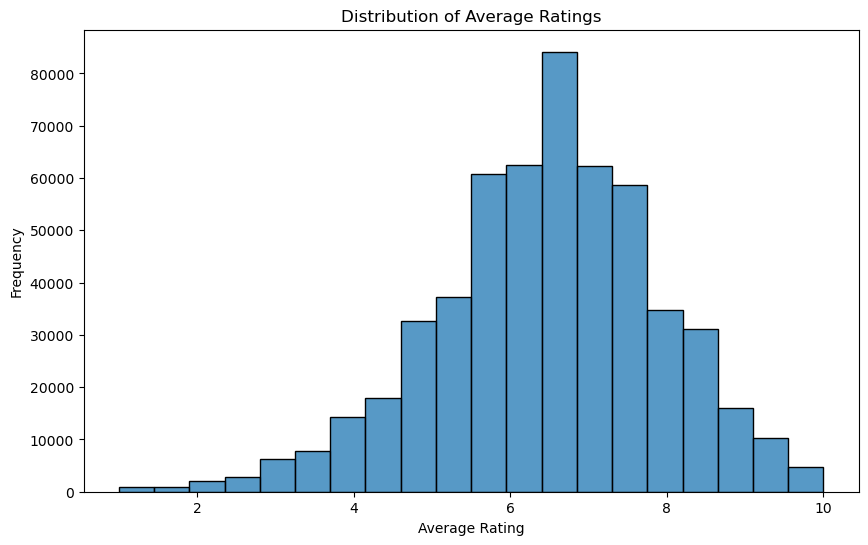

In [190]:
# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df1['averageRating'], bins=20)
plt.title('Distribution of Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()

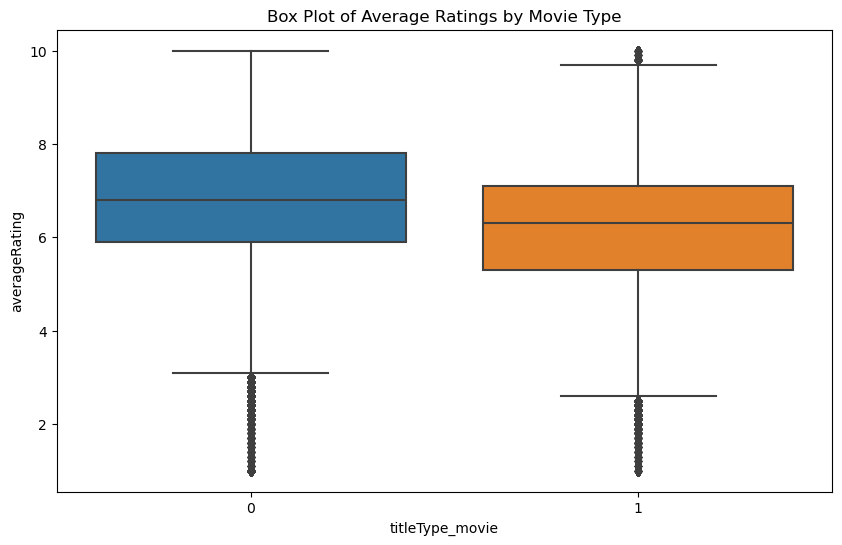

In [173]:
# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='titleType_movie', y='averageRating', data=df1)
plt.title('Box Plot of Average Ratings by Movie Type')
plt.show()



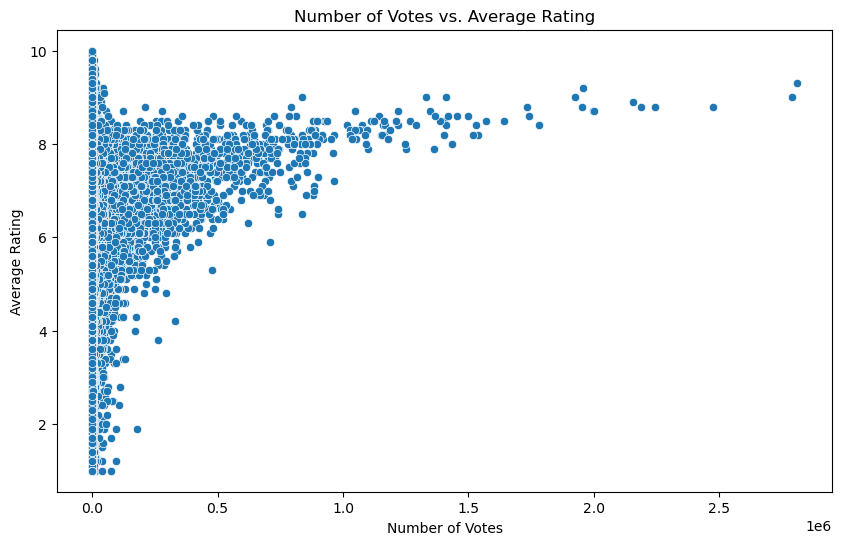

In [174]:

# Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='numVotes', y='averageRating', data=df1)
plt.title('Number of Votes vs. Average Rating')
plt.xlabel('Number of Votes')
plt.ylabel('Average Rating')
plt.show()


In [175]:
# Bar Chart
plt.figure(figsize=(10, 6))
df1.sum()[df1.columns.str.startswith('genre_')].sort_values().plot(kind='barh')
plt.title('Number of Movies by Genre')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()


TypeError: unsupported operand type(s) for +: 'int' and 'str'

<Figure size 1000x600 with 0 Axes>

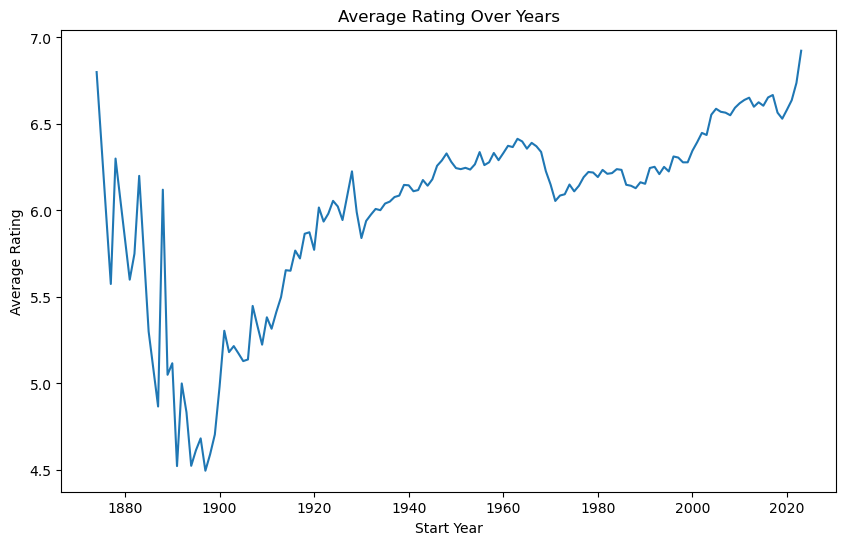

In [176]:
# Time Series Plot
plt.figure(figsize=(10, 6))
df1.groupby('startYear')['averageRating'].mean().plot()
plt.title('Average Rating Over Years')
plt.xlabel('Start Year')
plt.ylabel('Average Rating')
plt.show()

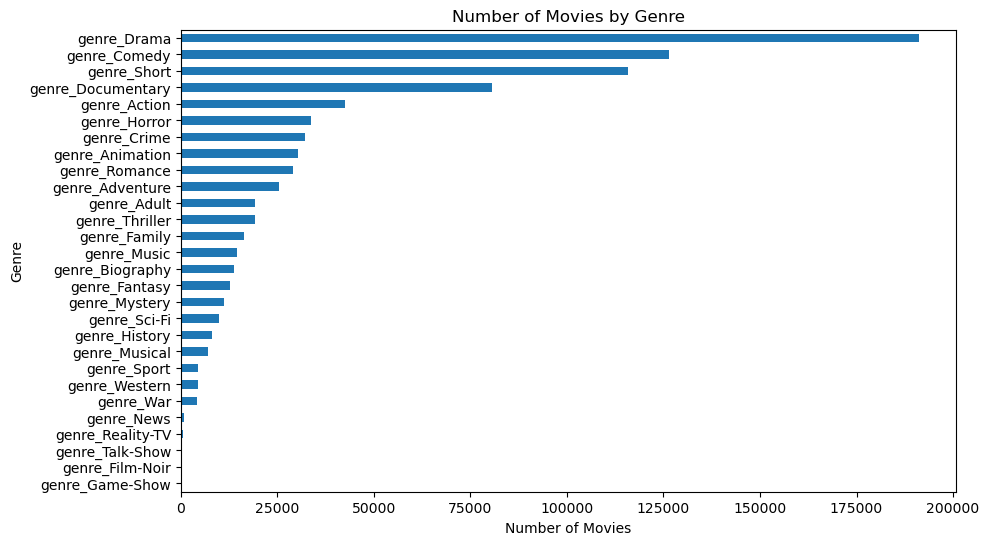

In [177]:
genre_columns = df1.filter(regex='^genre_').columns

if all(df1[genre_columns].apply(lambda x: np.issubdtype(x.dtype, np.number))):
    genre_sums = df1[genre_columns].sum().sort_values()

    # bar plot
    plt.figure(figsize=(10, 6))
    genre_sums.plot(kind='barh')
    plt.title('Number of Movies by Genre')
    plt.xlabel('Number of Movies')
    plt.ylabel('Genre')
    plt.show()
else:
    print("Non-numeric data detected in genre columns.")


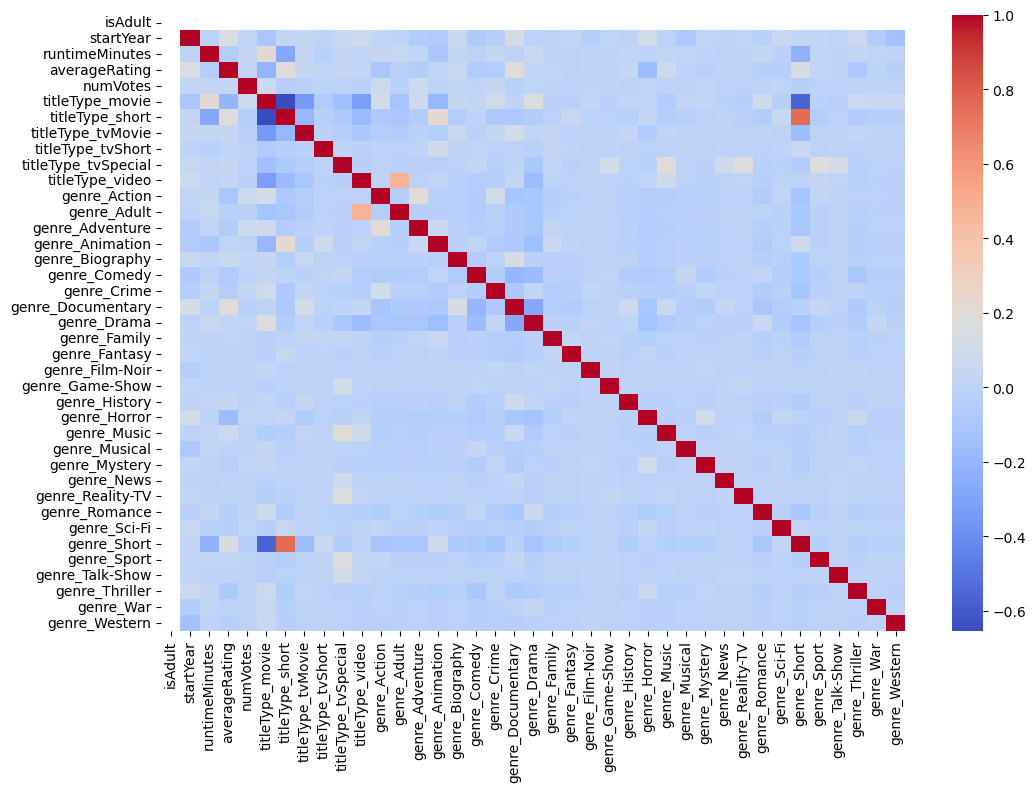

In [168]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [171]:
df.isna().sum()

isAdult                    0
startYear                 59
runtimeMinutes         63548
averageRating              0
numVotes                   0
titleType_movie            0
titleType_short            0
titleType_tvMovie          0
titleType_tvShort          0
titleType_tvSpecial        0
titleType_video            0
genre_Action               0
genre_Adult                0
genre_Adventure            0
genre_Animation            0
genre_Biography            0
genre_Comedy               0
genre_Crime                0
genre_Documentary          0
genre_Drama                0
genre_Family               0
genre_Fantasy              0
genre_Film-Noir            0
genre_Game-Show            0
genre_History              0
genre_Horror               0
genre_Music                0
genre_Musical              0
genre_Mystery              0
genre_News                 0
genre_Reality-TV           0
genre_Romance              0
genre_Sci-Fi               0
genre_Short                0
genre_Sport   

In [4]:
df = df.dropna(subset=['startYear', 'runtimeMinutes'])


In [ ]:
df.set_index('tconst', inplace =True)

# Without PCA

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import time



X = df.drop('averageRating', axis=1)  
y = df['averageRating']  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)


scaler = StandardScaler()


X_train_scaled = scaler.fit_transform(X_train)


X_test_scaled = scaler.transform(X_test)


In [23]:
start_time = time.time()
linear_model = LinearRegression()

linear_model.fit(X_train_scaled, y_train)

y_pred = linear_model.predict(X_test_scaled)


mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


end_time = time.time()
total_time = end_time - start_time 

print(f"Linear Regression MSE: {mse}")
print(f"Linear Regression RMSE: {rmse}")
print(f"Linear Regression MAE: {mae}")
print(f"Linear Regression R-squared: {r2}")
print(f"Computing Time: {total_time}")

Linear Regression MSE: 1.652633621814121
Linear Regression RMSE: 1.2855479850297775
Linear Regression MAE: 0.9965003229939857
Linear Regression R-squared: 0.16226080881355764
Computing Time: 0.223466157913208


In [17]:
start_time = time.time()
lasso_model = Lasso()

lasso_model.fit(X_train_scaled, y_train)

y_pred1 = lasso_model.predict(X_test_scaled)


l_mse = mean_squared_error(y_test, y_pred1)
l_rmse = mean_squared_error(y_test, y_pred1, squared=False)  
l_mae = mean_absolute_error(y_test, y_pred1)
l_r2 = r2_score(y_test, y_pred1)


end_time = time.time()
total_time = end_time - start_time 

print(f"Lasso Regression MSE: {l_mse}")
print(f"Lasso Regression RMSE: {l_rmse}")
print(f"Lasso Regression MAE: {l_mae}")
print(f"Lasso Regression R-squared: {l_r2}")
print(f"Computing Time: {total_time}")

Lasso Regression MSE: 1.9727589610221221
Lasso Regression RMSE: 1.4045493800582884
Lasso Regression MAE: 1.0963325922837333
Lasso Regression R-squared: -1.4446395161460401e-05
Computing Time: 0.17841482162475586


In [18]:
start_time = time.time()
ridge_model = Ridge()

ridge_model.fit(X_train_scaled, y_train)

y_pred2 = ridge_model.predict(X_test_scaled)


r_mse = mean_squared_error(y_test, y_pred2)
r_rmse = mean_squared_error(y_test, y_pred2, squared=False)  
r_mae = mean_absolute_error(y_test, y_pred2)
r_r2 = r2_score(y_test, y_pred2)


end_time = time.time()
total_time = end_time - start_time 

print(f"Ridge Regression MSE: {r_mse}")
print(f"Ridge Regression RMSE: {r_rmse}")
print(f"Ridge Regression MAE: {r_mae}")
print(f"Ridge Regression R-squared: {r_r2}")
print(f"Computing Time: {total_time}")

Ridge Regression MSE: 1.6526323766613444
Ridge Regression RMSE: 1.2855475007409662
Ridge Regression MAE: 0.996506762255127
Ridge Regression R-squared: 0.1622614399959722
Computing Time: 0.14157986640930176


In [19]:
start_time = time.time()
rf_model = RandomForestRegressor()

rf_model.fit(X_train_scaled, y_train)

y_pred3 = rf_model.predict(X_test_scaled)


rf_mse = mean_squared_error(y_test, y_pred3)
rf_rmse = mean_squared_error(y_test, y_pred3, squared=False)  
rf_mae = mean_absolute_error(y_test, y_pred3)
rf_r2 = r2_score(y_test, y_pred3)


end_time = time.time()
total_time = end_time - start_time 

print(f"Random Forrest MSE: {rf_mse}")
print(f"Random Forrest RMSE: {rf_rmse}")
print(f"Random Forrest MAE: {rf_mae}")
print(f"Random Forrest R-squared: {rf_r2}")
print(f"Computing Time: {total_time}")

Linear Regression MSE: 1.5242035746899396
Linear Regression RMSE: 1.2345863982281433
Linear Regression MAE: 0.9335617308827272
Linear Regression R-squared: 0.22736349242212672
Computing Time: 271.8334357738495


# With PCA

In [21]:
pca = PCA(n_components=0.90)
X_train_pca = pca.fit_transform(X_train_scaled)

X_test_pca = pca.transform(X_test_scaled)

In [22]:
start_time = time.time()
linear_model = LinearRegression()

linear_model.fit(X_train_pca, y_train)

y_pred4 = linear_model.predict(X_test_pca)


lr_p_mse = mean_squared_error(y_test, y_pred4)
lr_p_rmse = mean_squared_error(y_test, y_pred4, squared=False)  
lr_p_mae = mean_absolute_error(y_test, y_pred4)
lr_p_r2 = r2_score(y_test, y_pred4)


end_time = time.time()
total_time = end_time - start_time 

print(f"Linear Regression MSE: {lr_p_mse}")
print(f"Linear Regression RMSE: {lr_p_rmse}")
print(f"Linear Regression MAE: {lr_p_mae}")
print(f"Linear Regression R-squared: {lr_p_r2}")
print(f"Computing Time: {total_time}")

Linear Regression MSE: 1.6845836042932902
Linear Regression RMSE: 1.2979150990312465
Linear Regression MAE: 1.0072967129676207
Linear Regression R-squared: 0.14606499134547346
Computing Time: 0.22043752670288086


In [24]:
start_time = time.time()
lasso_model = Lasso()

lasso_model.fit(X_train_pca, y_train)

y_pred5 = lasso_model.predict(X_test_pca)


la_p_mse = mean_squared_error(y_test, y_pred5)
la_p_rmse = mean_squared_error(y_test, y_pred5, squared=False)  
la_p_mae = mean_absolute_error(y_test, y_pred5)
la_p_r2 = r2_score(y_test, y_pred5)


end_time = time.time()
total_time = end_time - start_time 

print(f"Lasso Regression MSE: {la_p_mse}")
print(f"Lasso Regression RMSE: {la_p_rmse}")
print(f"Lasso Regression MAE: {la_p_mae}")
print(f"Lasso Regression R-squared: {la_p_r2}")
print(f"Computing Time: {total_time}")

Lasso Regression MSE: 1.9727589610221221
Lasso Regression RMSE: 1.4045493800582884
Lasso Regression MAE: 1.0963325922837333
Lasso Regression R-squared: -1.4446395161460401e-05
Computing Time: 0.12948131561279297


In [25]:
start_time = time.time()
ridge_model = Ridge()

ridge_model.fit(X_train_pca, y_train)

y_pred6 = ridge_model.predict(X_test_pca)


r_p_mse = mean_squared_error(y_test, y_pred6)
r_p_rmse = mean_squared_error(y_test, y_pred6, squared=False)  
r_p_mae = mean_absolute_error(y_test, y_pred6)
r_p_r2 = r2_score(y_test, y_pred6)


end_time = time.time()
total_time = end_time - start_time 

print(f"Ridge Regression MSE: {r_p_mse}")
print(f"Ridge Regression RMSE: {r_p_rmse}")
print(f"Ridge Regression MAE: {r_p_mae}")
print(f"Ridge Regression R-squared: {r_p_r2}")
print(f"Computing Time: {total_time}")

Ridge Regression MSE: 1.6845836041454756
Ridge Regression RMSE: 1.2979150989743033
Ridge Regression MAE: 1.0072967123563425
Ridge Regression R-squared: 0.1460649914204024
Computing Time: 0.11056184768676758


In [42]:
start_time = time.time()
rf_model = RandomForestRegressor()

df_sample = df.sample(frac=0.5, random_state=3)


X_sample = df_sample.drop('averageRating', axis=1)
y_sample = df_sample['averageRating']


X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=3)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

rf_model.fit(X_train, y_train)

y_pred7 = rf_model.predict(X_test)


rf_p_mse = mean_squared_error(y_test, y_pred7)
rf_p_rmse = mean_squared_error(y_test, y_pred7, squared=False)  
rf_p_mae = mean_absolute_error(y_test, y_pred7)
rf_p_r2 = r2_score(y_test, y_pred7)


end_time = time.time()
total_time = end_time - start_time 

print(f"Random Forrest MSE: {rf_p_mse}")
print(f"Random Forrest RMSE: {rf_p_rmse}")
print(f"Random Forrest MAE: {rf_p_mae}")
print(f"Random Forrest R-squared: {rf_p_r2}")
print(f"Computing Time: {total_time}")

Random Forrest MSE: 1.5288005472562631
Random Forrest RMSE: 1.236446742587914
Random Forrest MAE: 0.9349111088239197
Random Forrest R-squared: 0.22482582828685838
Computing Time: 180.8328583240509
